In [1]:
# Macro-Average ROC Comparison Notebook

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
# === Step 1: Load Predictions and Labels for Each Model ===
y_true_resnet = np.load("y_true_resnet.npy")
y_pred_resnet = np.load("y_pred_resnet.npy")

y_true_xresnet = np.load("y_true_xresnet.npy")
y_pred_xresnet = np.load("y_pred_xresnet.npy")

y_true_transformer = np.load("y_true_transformer.npy")
y_pred_transformer = np.load("y_pred_transformer.npy")

y_true_xlstm = np.load("y_true_xlstm.npy")
y_pred_xlstm = np.load("y_pred_xlstm.npy")

y_true_transformer_cnn = np.load("y_true_transformer_CNN.npy")
y_pred_transformer_cnn = np.load("y_pred_transformer_CNN.npy")


In [3]:
# === Step 2: Define Macro-Average ROC Calculator ===
def compute_macro_roc(y_true, y_pred):
    n_classes = y_true.shape[1]
    fpr_dict, tpr_dict = {}, {}

    for i in range(n_classes):
        fpr_dict[i], tpr_dict[i], _ = roc_curve(y_true[:, i], y_pred[:, i])

    all_fpr = np.unique(np.concatenate([fpr_dict[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr_dict[i], tpr_dict[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    return all_fpr, mean_tpr, macro_auc

In [4]:
# === Step 3: Compute Macro ROC Curves ===
fpr_resnet, tpr_resnet, roc_auc_resnet = compute_macro_roc(y_true_resnet, y_pred_resnet)
fpr_xresnet, tpr_xresnet, roc_auc_xresnet = compute_macro_roc(y_true_xresnet, y_pred_xresnet)
fpr_transformer, tpr_transformer, roc_auc_transformer = compute_macro_roc(y_true_transformer, y_pred_transformer)
fpr_xlstm, tpr_xlstm, roc_auc_xlstm = compute_macro_roc(y_true_xlstm, y_pred_xlstm)
fpr_transformer_cnn, tpr_transformer_cnn, roc_auc_transformer_cnn = compute_macro_roc(y_true_transformer_cnn, y_pred_transformer_cnn)

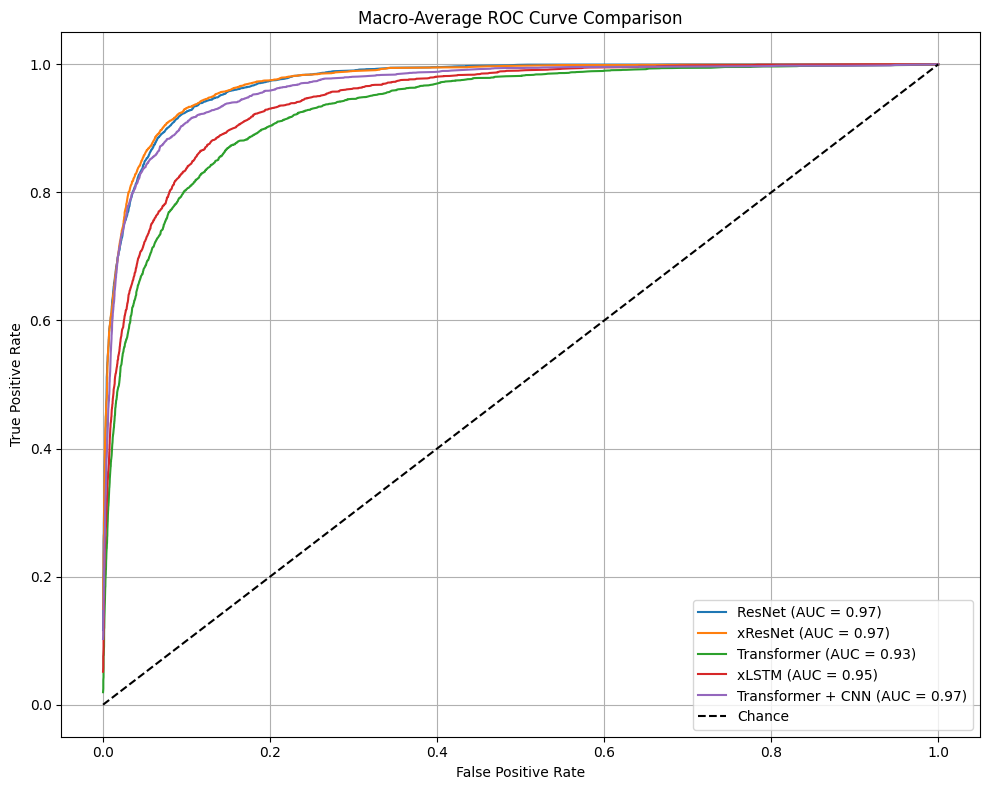

In [5]:
# === Step 4: Plot All Macro-Average ROC Curves ===
plt.figure(figsize=(10, 8))
plt.plot(fpr_resnet, tpr_resnet, label=f"ResNet (AUC = {roc_auc_resnet:.2f})")
plt.plot(fpr_xresnet, tpr_xresnet, label=f"xResNet (AUC = {roc_auc_xresnet:.2f})")
plt.plot(fpr_transformer, tpr_transformer, label=f"Transformer (AUC = {roc_auc_transformer:.2f})")
plt.plot(fpr_xlstm, tpr_xlstm, label=f"xLSTM (AUC = {roc_auc_xlstm:.2f})")
plt.plot(fpr_transformer_cnn, tpr_transformer_cnn, label=f"Transformer + CNN (AUC = {roc_auc_transformer_cnn:.2f})")



# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', label="Chance")

# Formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-Average ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()